
Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


No handles with labels found to put in legend.
No handles with labels found to put in legend.


WARNING. Please provide a elem_group_series for split mesh in grops.
WARNING. Please provide a elem_group_series for split mesh in grops.


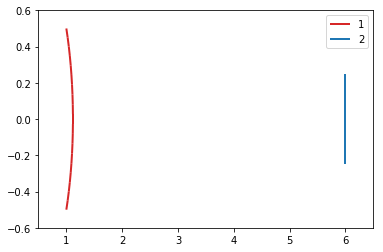

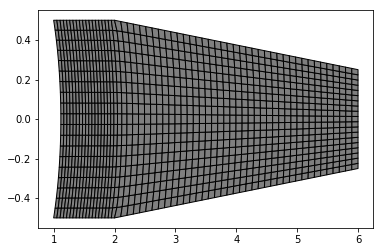

In [1]:
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy

msh_dict = {}
msh_dict[1] =  amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')


domain_id = {}
domain_id[1] = 3
domain_id[2] = 8

# select mesh to be plotted
mesh_id = 1
mshfile = msh_dict[mesh_id]

m = amfe.Mesh()
m.import_msh(mshfile)

# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)


# splitting physical grops

m.split_in_groups()

# plotting boundary elements
amfe.plot_boundary_1d(m)



# plotting mesh
amfe.plot_submesh(m.groups[domain_id[mesh_id]])


# setting boundary condition
# selecting subdomain for boundary condition
sub_dir = m.get_submesh('physical',1)
sub_neu = m.get_submesh('physical',2)

value = 5.0E9
neu = amfe.boundary.Boundary(sub_neu,value,'normal')
diri = amfe.boundary.Boundary(sub_dir,0,'xy','dirichlet')


# setting main domain for FE calculation
domain = m.set_domain('phys_group', domain_id[mesh_id])
domain.set_material(my_material)
domain.append_bondary_condition(neu)
domain.append_bondary_condition(diri)


plt.show()

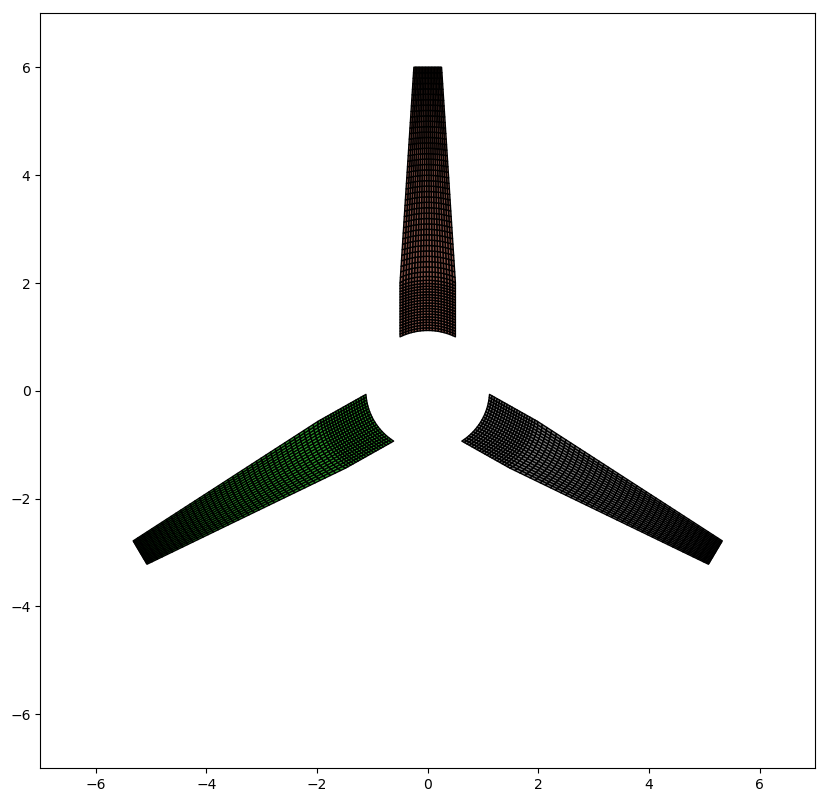

In [24]:
# plotting mesh
#alpha = 10

sys.path.append(r"H:\TUM-PC\Dokumente\Projects\FETI")
from cyclic_domain_test import *

alpha = [90,210,330]
submesh_dict = {}

for key,alpha_i in enumerate(alpha):
    new = rot_z(m.nodes,alpha_i)
    submesh = copy.deepcopy(m.groups[domain_id[mesh_id]])
    submesh.parent_mesh.nodes = new
    submesh = m.groups[domain_id[mesh_id]]
    submesh.parent_mesh.nodes = new
    submesh_dict[key] = copy.deepcopy(submesh)



fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
ax1 = amfe.plot_submesh(submesh_dict[0],ax1)
ax1 = amfe.plot_submesh(submesh_dict[1],ax1)
ax1 = amfe.plot_submesh(submesh_dict[2],ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()
    

Extract interface node from sub_3 and sub_2
Extract interface node from sub_2 and sub_1
Interface nodes from sub_2 and sub_3 already extracted
Interface nodes from sub_1 and sub_2 already extracted


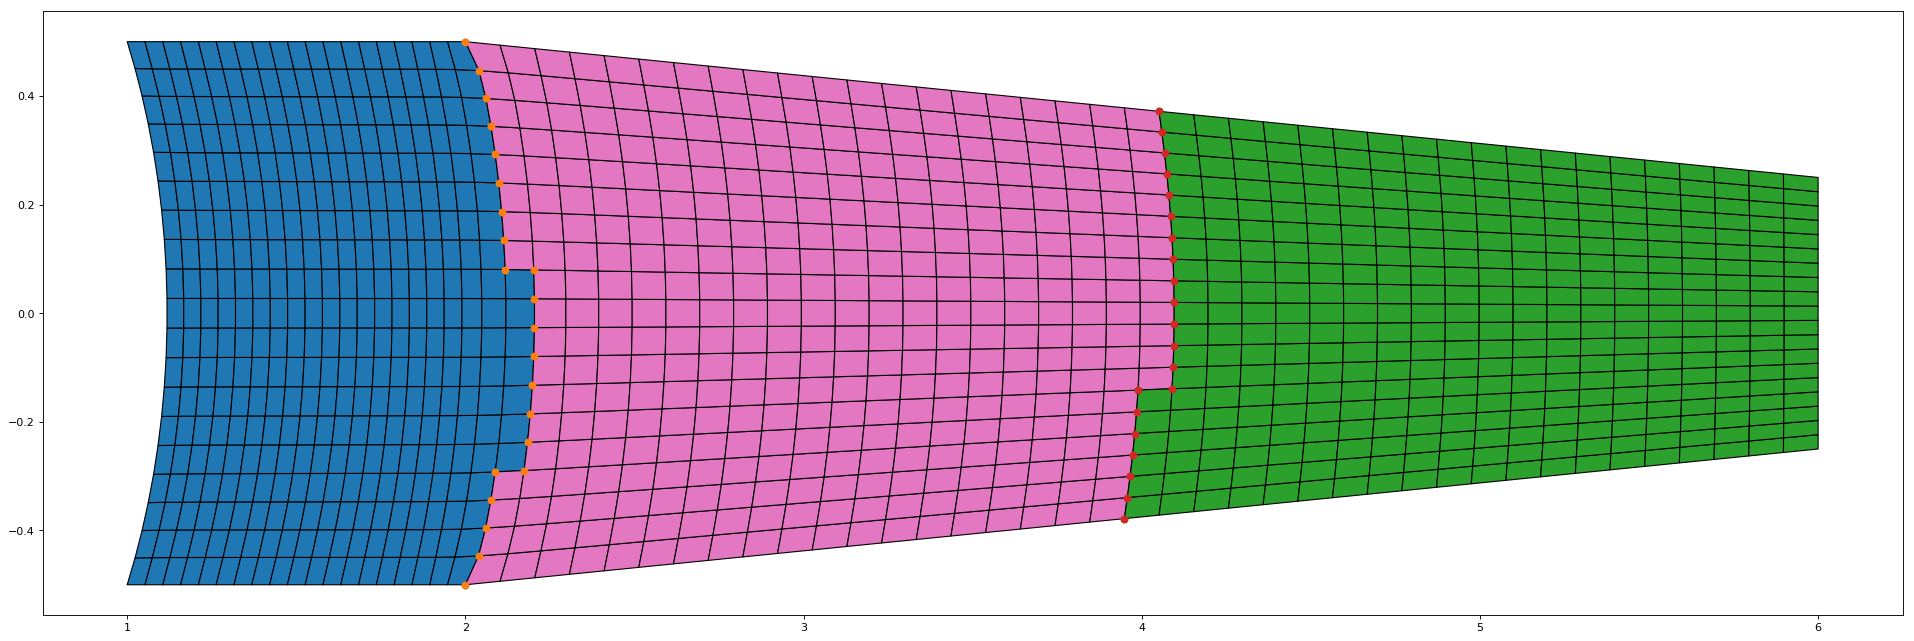

In [5]:
fig, ax1=plt.subplots(1,figsize=(30, 10), dpi= 80, facecolor='w', edgecolor='k')
domain.split_in_partitions()
amfe.plot_domain(domain,ax1)
plt.show()

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# plotting mesh
#alpha = 10



def plot_rot(alpha=0):
    fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    
    for key in domain.groups:    
        s1 = amfe.FETIsubdomain(domain.groups[key])
        new_nodes = rot_z(s1.mesh.nodes,alpha,ref_point_vector=[0.0,0.0,0.0])

        connectivity = s1.mesh.connectivity
        displacement = s1.displacement

        amfe.plotDeformQuadMesh(connectivity, new_nodes, displacement, factor=1, ax =ax1)

    plt.xlim([-7,7])
    plt.ylim([-2,7])
    plt.show()
    
interact(plot_rot,alpha=(0,180,5))   

A Jupyter Widget

<function __main__.plot_rot>

In [14]:
s1 = amfe.FETIsubdomain(domain.groups[1])

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 367 elements and 814 dofs.
Time taken for preallocation: 0.01 seconds.


NameError: name 'np' is not defined